In [115]:
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns

In [177]:
df = pd.read_csv('DataSet/Boston Housing.csv')

In [178]:
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [118]:
df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [119]:
df.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

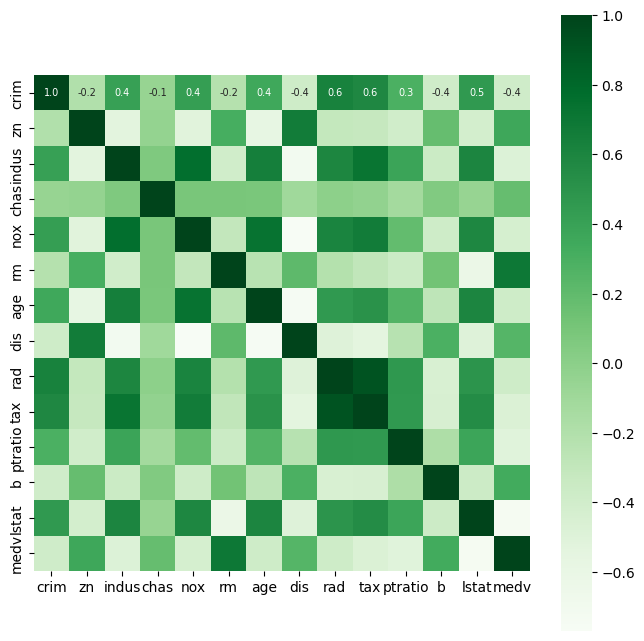

In [120]:
# Plotting the heatmap of correlation between features
plt.figure(figsize=(8,8))
corr = df.corr()
sns.heatmap(corr, annot=True, cbar=True, square = True, fmt='.1f',annot_kws={'size':7}, cmap='Greens')
plt.show()

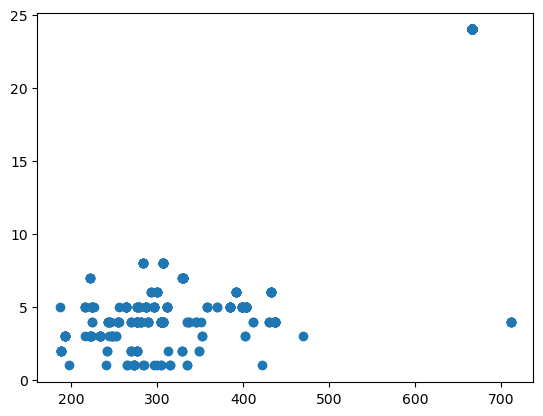

In [121]:
plt.scatter(df['tax'],df['rad'])

In [122]:
df.age.value_counts()

age
100.0    43
95.4      4
96.0      4
98.2      4
97.9      4
         ..
58.4      1
74.4      1
73.4      1
33.1      1
89.3      1
Name: count, Length: 356, dtype: int64

/var/folders/q7/54zdqqsd2k97cjf5y4lqxf_00000gn/T/ipykernel_94438/1943185208.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df['age'], kde=True, palette='Set2')
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


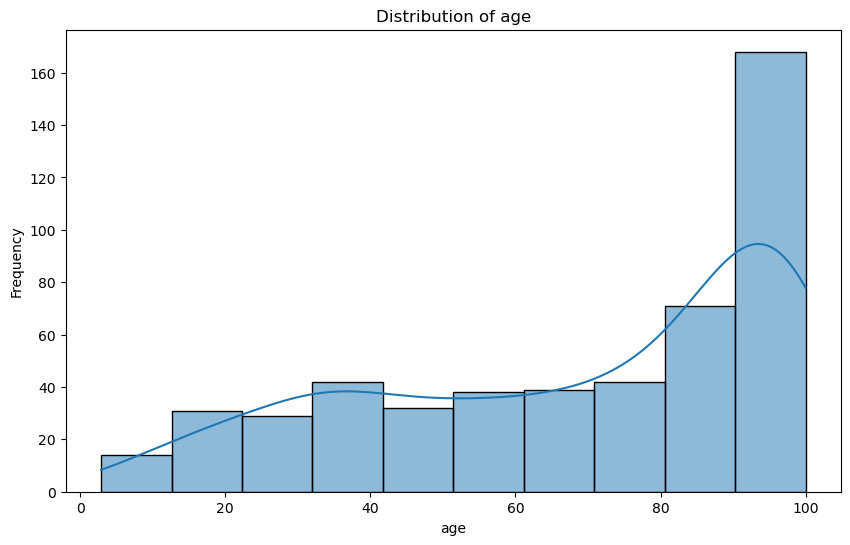

In [123]:
# View the distribution of the target variable 
plt.figure(figsize=(10, 6))
sns.histplot(df['age'], kde=True, palette='Set2')
plt.title('Distribution of age')
plt.xlabel('age')
plt.ylabel('Frequency')
plt.grid(False)
plt.show()

array([[<Axes: title={'center': 'crim'}>, <Axes: title={'center': 'zn'}>,
        <Axes: title={'center': 'indus'}>,
        <Axes: title={'center': 'chas'}>],
       [<Axes: title={'center': 'nox'}>, <Axes: title={'center': 'rm'}>,
        <Axes: title={'center': 'age'}>, <Axes: title={'center': 'dis'}>],
       [<Axes: title={'center': 'rad'}>, <Axes: title={'center': 'tax'}>,
        <Axes: title={'center': 'ptratio'}>,
        <Axes: title={'center': 'b'}>],
       [<Axes: title={'center': 'lstat'}>,
        <Axes: title={'center': 'medv'}>, <Axes: >, <Axes: >]],
      dtype=object)

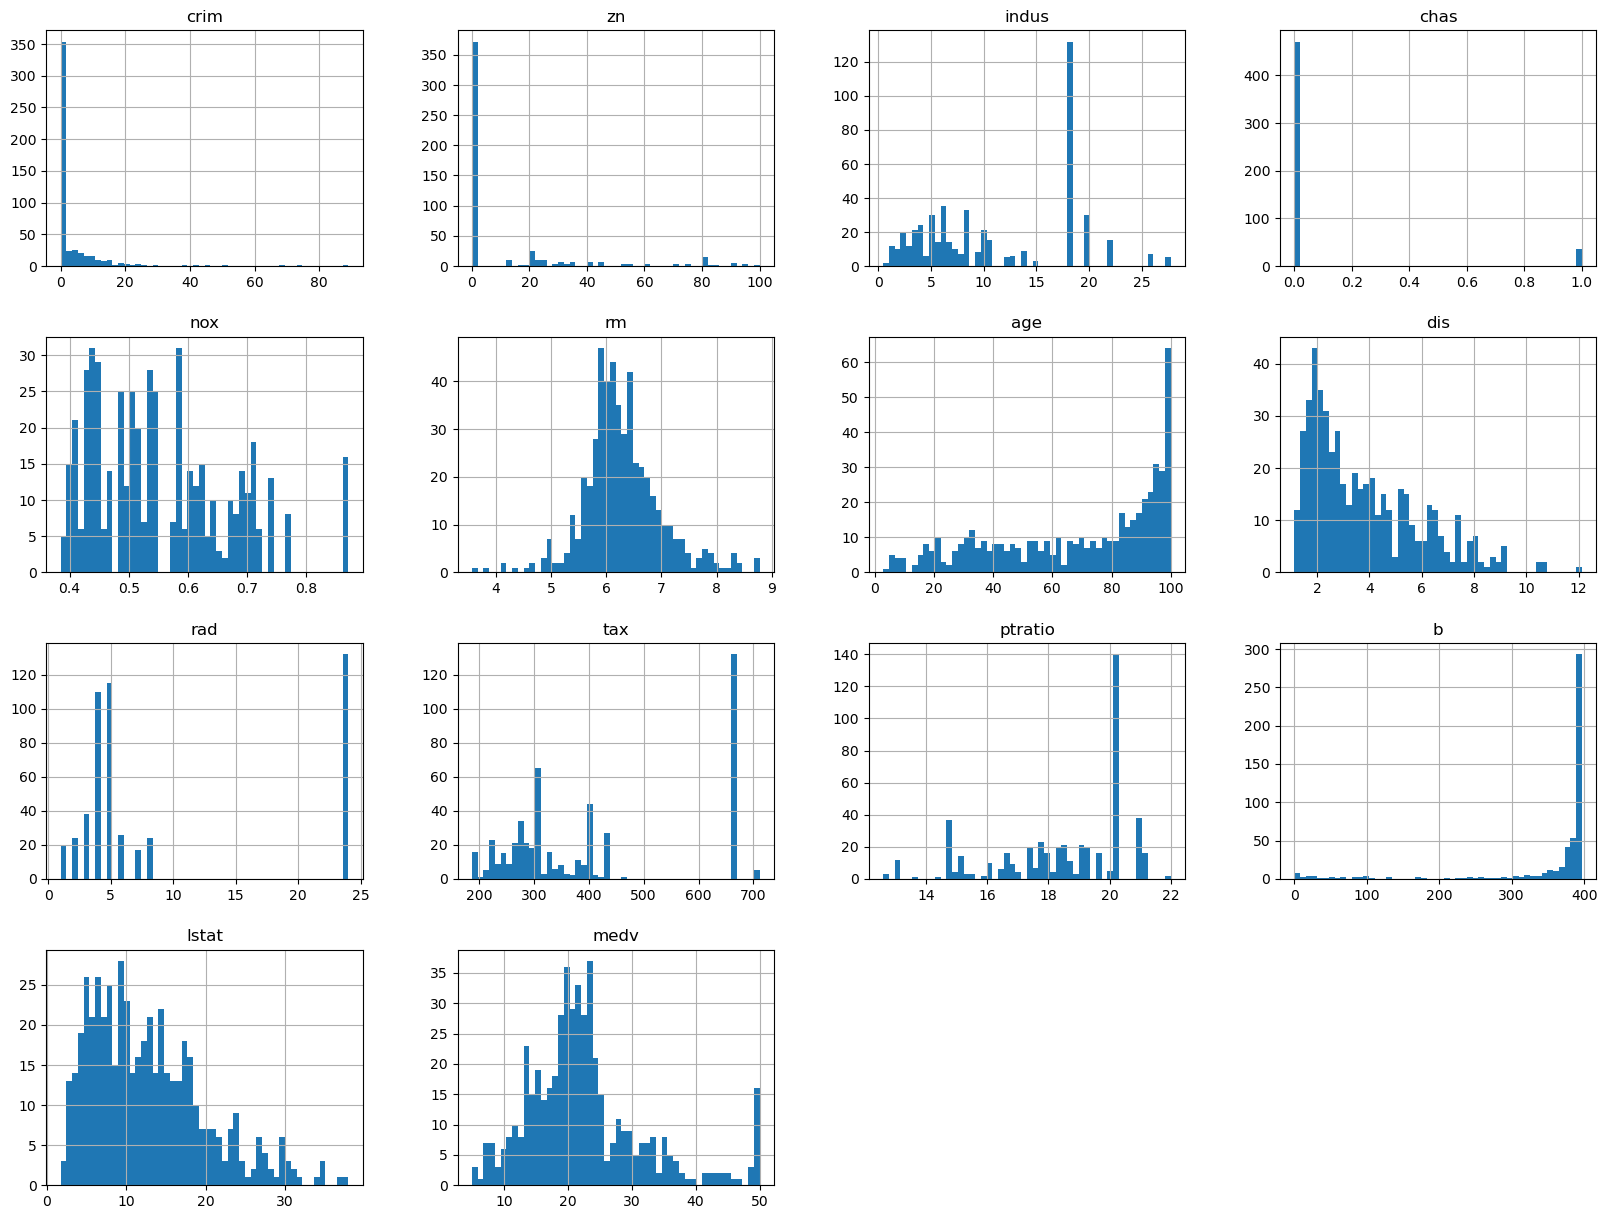

In [124]:
df.hist(bins=50,figsize=(20,15))

In [125]:
corr = df.corr()
corr["medv"].sort_values(ascending=False)

medv       1.000000
rm         0.695360
zn         0.360445
b          0.333461
dis        0.249929
chas       0.175260
age       -0.376955
rad       -0.381626
crim      -0.388305
nox       -0.427321
tax       -0.468536
indus     -0.483725
ptratio   -0.507787
lstat     -0.737663
Name: medv, dtype: float64

array([[<Axes: xlabel='medv', ylabel='medv'>,
        <Axes: xlabel='rm', ylabel='medv'>,
        <Axes: xlabel='zn', ylabel='medv'>,
        <Axes: xlabel='b', ylabel='medv'>,
        <Axes: xlabel='ptratio', ylabel='medv'>,
        <Axes: xlabel='lstat', ylabel='medv'>],
       [<Axes: xlabel='medv', ylabel='rm'>,
        <Axes: xlabel='rm', ylabel='rm'>,
        <Axes: xlabel='zn', ylabel='rm'>,
        <Axes: xlabel='b', ylabel='rm'>,
        <Axes: xlabel='ptratio', ylabel='rm'>,
        <Axes: xlabel='lstat', ylabel='rm'>],
       [<Axes: xlabel='medv', ylabel='zn'>,
        <Axes: xlabel='rm', ylabel='zn'>,
        <Axes: xlabel='zn', ylabel='zn'>,
        <Axes: xlabel='b', ylabel='zn'>,
        <Axes: xlabel='ptratio', ylabel='zn'>,
        <Axes: xlabel='lstat', ylabel='zn'>],
       [<Axes: xlabel='medv', ylabel='b'>,
        <Axes: xlabel='rm', ylabel='b'>, <Axes: xlabel='zn', ylabel='b'>,
        <Axes: xlabel='b', ylabel='b'>,
        <Axes: xlabel='ptratio', ylabel='b'>,

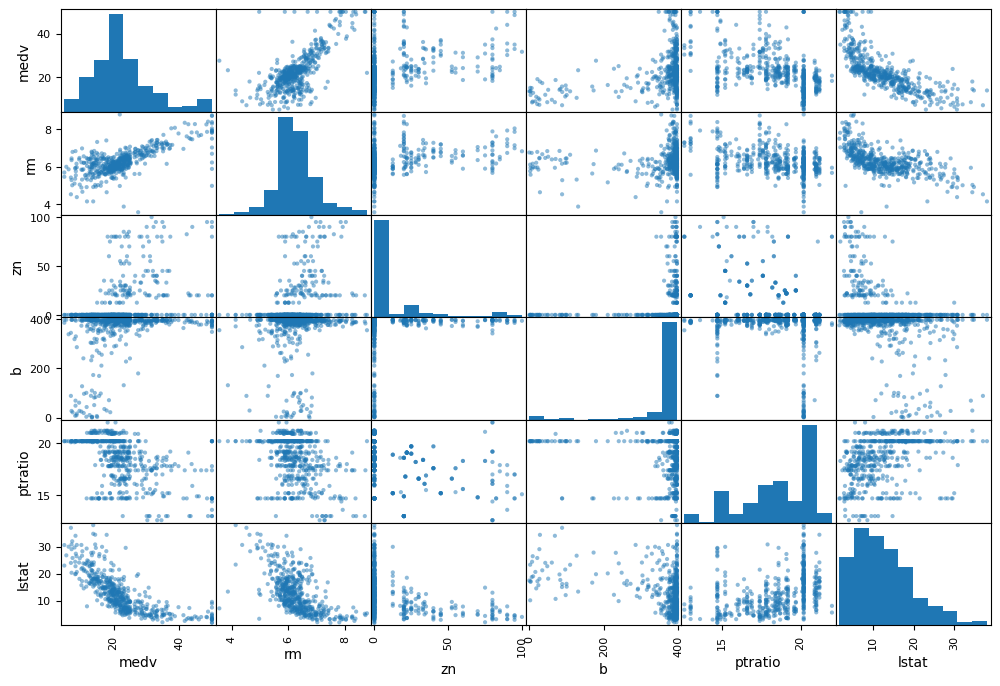

In [126]:
from pandas.plotting import scatter_matrix
attr = ["medv","rm","zn","b","ptratio","lstat"]
scatter_matrix(df[attr],figsize=(12,8))

<Axes: xlabel='rm', ylabel='medv'>

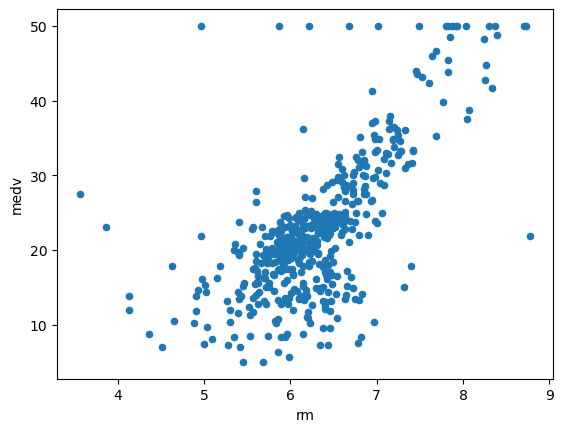

In [127]:
df.plot(kind = "scatter", x="rm", y ="medv")
#上面有一条线要注意

<Axes: xlabel='lstat', ylabel='medv'>

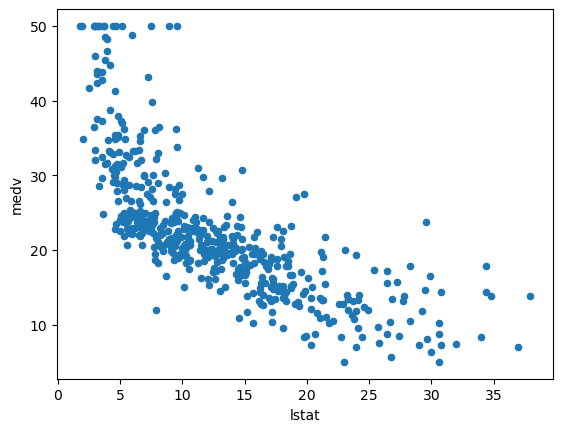

In [128]:
df.plot(kind = "scatter", x="lstat", y ="medv")

/var/folders/q7/54zdqqsd2k97cjf5y4lqxf_00000gn/T/ipykernel_94438/2231606638.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df['medv'], kde=True, palette='Set2')
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


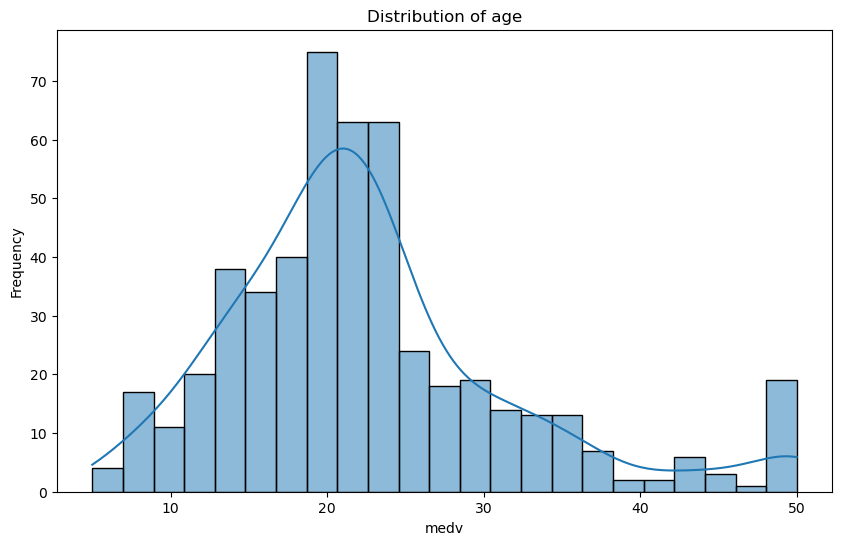

In [129]:
plt.figure(figsize=(10, 6))
sns.histplot(df['medv'], kde=True, palette='Set2')
plt.title('Distribution of age')
plt.xlabel('medv')
plt.ylabel('Frequency')
plt.grid(False)
plt.show()

In [164]:
X = df.drop(["medv"],axis=1)
y = df['medv']
y.head()
X.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33


In [147]:
from sklearn.preprocessing import MinMaxScaler
# 归一化 0~1
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)
X_normalized

array([[0.00000000e+00, 1.80000000e-01, 6.78152493e-02, ...,
        2.87234043e-01, 1.00000000e+00, 8.96799117e-02],
       [2.35922539e-04, 0.00000000e+00, 2.42302053e-01, ...,
        5.53191489e-01, 1.00000000e+00, 2.04470199e-01],
       [2.35697744e-04, 0.00000000e+00, 2.42302053e-01, ...,
        5.53191489e-01, 9.89737254e-01, 6.34657837e-02],
       ...,
       [6.11892474e-04, 0.00000000e+00, 4.20454545e-01, ...,
        8.93617021e-01, 1.00000000e+00, 1.07891832e-01],
       [1.16072990e-03, 0.00000000e+00, 4.20454545e-01, ...,
        8.93617021e-01, 9.91300620e-01, 1.31070640e-01],
       [4.61841693e-04, 0.00000000e+00, 4.20454545e-01, ...,
        8.93617021e-01, 1.00000000e+00, 1.69701987e-01]])

In [148]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, random_state=1)

In [149]:
#查看训练集和测试集
print ( X_train.shape)
print( y_train.shape)
print(X_test.shape) 
print( y_test.shape)


(379, 13)
(379,)
(127, 13)
(127,)


In [161]:
print(X_train[:2])

[[4.37788609e-04 0.00000000e+00 4.20454545e-01 0.00000000e+00
  3.86831276e-01 4.90323817e-01 7.60041195e-01 1.05293310e-01
  0.00000000e+00 1.64122137e-01 8.93617021e-01 1.00000000e+00
  2.02814570e-01]
 [1.49286478e-03 0.00000000e+00 1.31598240e-01 0.00000000e+00
  2.57201646e-01 3.85322859e-01 8.81565396e-01 1.33355764e-01
  1.73913043e-01 2.08015267e-01 4.25531915e-01 1.00000000e+00
  3.57615894e-01]]


In [150]:
from sklearn import linear_model
clf = linear_model.LinearRegression()#定义线性模型
clf.fit(X_train, y_train)

LinearRegression()

In [179]:
print (clf.intercept_ )
print (clf.coef_)
clf.predict(X_test)

30.434315820955838
[-10.18072577   5.7129978    1.0448317    2.42854641 -10.31905505
  15.01628506   0.67107567 -16.18284737   7.03303653  -5.5937189
  -9.36369973   2.48951602 -20.20069882]


array([32.37816533, 27.95684437, 18.07213891, 21.63166556, 18.93029508,
       19.96277202, 32.2834674 , 18.06715668, 24.72989076, 26.85359369,
       27.23326816, 28.57021239, 21.18778302, 26.94393815, 23.37892579,
       20.89176865, 17.11746934, 37.73997945, 30.51980066,  8.44489436,
       20.86557977, 16.21989418, 25.13605925, 24.77658813, 31.40497629,
       11.02741407, 13.82097563, 16.80208261, 35.94637198, 14.7155729 ,
       21.23939821, 14.15079469, 42.72492585, 17.83887162, 21.84610225,
       20.40178099, 17.50287927, 27.00093206,  9.80760408, 20.00288662,
       24.27066782, 21.06719021, 29.47089776, 16.48482565, 19.38852695,
       14.54778282, 39.39838319, 18.09810655, 26.22164983, 20.60676525,
       25.09994066, 24.48366723, 25.02297948, 26.84986898,  5.01517985,
       24.12809513, 10.72843392, 26.83178157, 16.8023533 , 35.48142073,
       19.50937911, 27.43260347, 16.58016763, 19.151488  , 10.9990262 ,
       32.05016535, 36.32672849, 21.8596379 , 24.8158357 , 25.32

In [171]:
score_test = clf.score(X_test, y_test)
score_train = clf.score(X_train, y_train)
print("test score:",score_test)
print("train score:",score_train)


test score: 0.7789410172622857
train score: 0.7168057552393374


In [176]:
from sklearn.model_selection import cross_val_score 
scores = cross_val_score(linear_model.LinearRegression(), X_normalized, y, cv=5, scoring= 'r2')
print("Cross-validation scores:", scores)

Cross-validation scores: [ 0.63919994  0.71386698  0.58702344  0.07923081 -0.25294154]
